<a href="https://colab.research.google.com/github/Bhagyasri00/kyphosis/blob/main/kyphosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [ ]:
df= pd.read_csv('/content/kyphosis.csv')
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [ ]:
df.dtypes

Kyphosis    object
Age          int64
Number       int64
Start        int64
dtype: object

In [ ]:
df.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [ ]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
76    False
77    False
78    False
79    False
80    False
Length: 81, dtype: bool

In [ ]:
df= df.rename(columns={'Age' : 'Age(months)'})

In [ ]:
plt.style.use('dark_background')

<ipython-input-8-92ed4473a0c1>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x='Age(months)', data=df, kde= True, palette='Pastel')


Text(0.5, 1.0, 'Age Distribution in the Dataset')

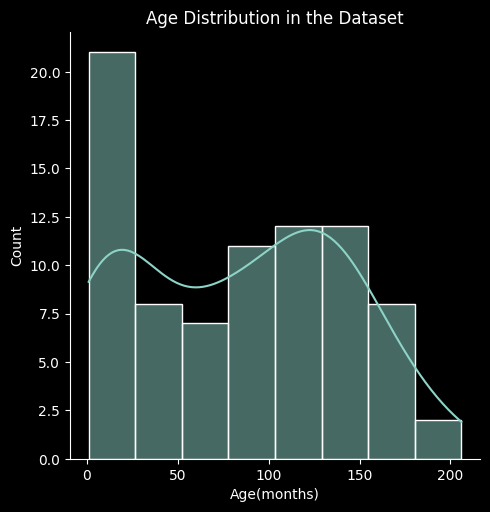

In [ ]:
sns.displot(x='Age(months)', data=df, kde= True, palette='Pastel')
plt.title('Age Distribution in the Dataset')

In [ ]:
kyphosis_counts= df['Kyphosis'].value_counts()

Text(0.5, 1.0, 'What percentage of individuals have kyphosis??')

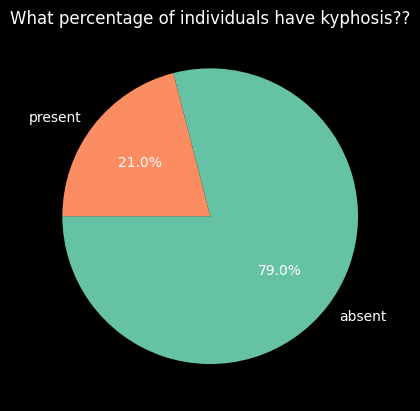

In [ ]:
plt.pie(kyphosis_counts, labels= kyphosis_counts.index , autopct= '%1.1f%%', startangle=180 , colors=plt.cm.Set2.colors)
plt.title("What percentage of individuals have kyphosis??")

In [ ]:
individuals_with_kyphosis= df[df['Kyphosis']== 'present']

In [ ]:
individuals_with_kyphosis

,Kyphosis,Age(months),Number,Start
2,present,128,4,5
9,present,59,6,12
10,present,82,5,14
21,present,105,6,5
22,present,96,3,12
24,present,15,7,2
37,present,52,5,6
39,present,91,5,12
40,present,73,5,1
45,present,139,3,10


Text(0.5, 1.0, 'Age Distribution of Individuals with Kyphosis')

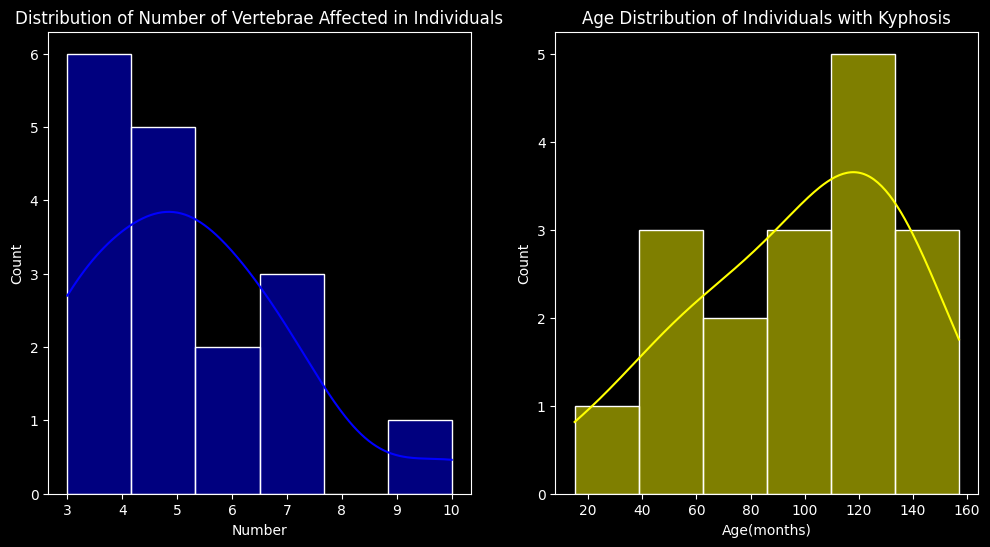

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(x='Number', data=individuals_with_kyphosis, kde=True, color='Blue', ax=axes[0])
axes[0].set_title('Distribution of Number of Vertebrae Affected in Individuals')

sns.histplot(x='Age(months)', data=individuals_with_kyphosis, kde=True, color='yellow', ax=axes[1])
axes[1].set_title('Age Distribution of Individuals with Kyphosis')

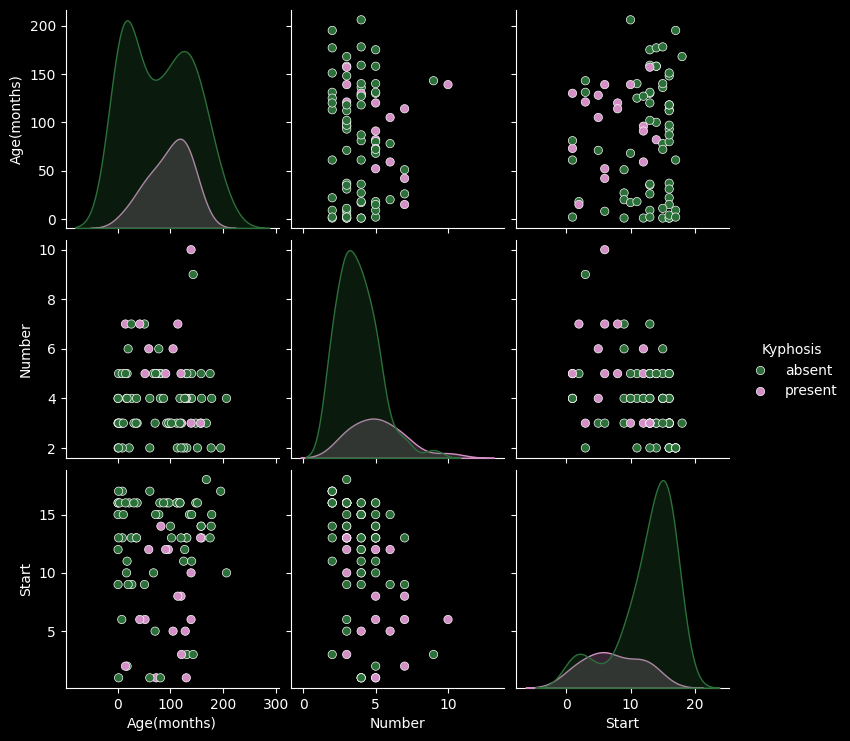

In [ ]:
sns.pairplot(df,hue='Kyphosis',palette='cubehelix')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
df['Kyphosis'] = label_encoder.fit_transform(df['Kyphosis'])

In [ ]:
df

,Kyphosis,Age(months),Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [ ]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, random_state=42)

In [ ]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42)

In [ ]:
best_rf = random_search.best_estimator_

In [ ]:
training_score = best_rf.score(X_train, y_train)
testing_score = best_rf.score(X_test, y_test)

In [ ]:
print("Training Score:", training_score)
print("Testing Score:", testing_score)

Training Score: 0.9464285714285714
Testing Score: 0.8


In [ ]:
y_pred = best_rf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        19
           1       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



In [ ]:
from sklearn import metrics

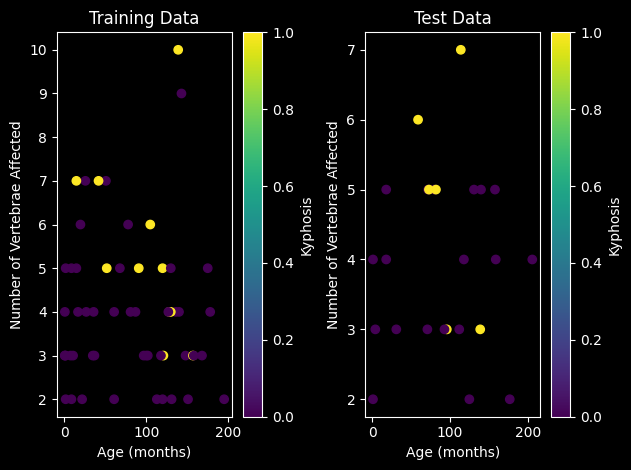

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(X_train['Age(months)'], X_train['Number'], c=y_train, cmap='viridis')
plt.title('Training Data')
plt.xlabel('Age (months)')
plt.ylabel('Number of Vertebrae Affected')
plt.colorbar(label='Kyphosis')

plt.subplot(1, 2, 2)
plt.scatter(X_test['Age(months)'], X_test['Number'], c=y_test, cmap='viridis')
plt.title('Test Data')
plt.xlabel('Age (months)')
plt.ylabel('Number of Vertebrae Affected')
plt.colorbar(label='Kyphosis')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
tree = best_rf.estimators_[0]

class_names = [str(c) for c in best_rf.classes_]

dot_data = export_graphviz(tree, out_file=None,
                           feature_names=X.columns,
                           class_names=class_names,
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)

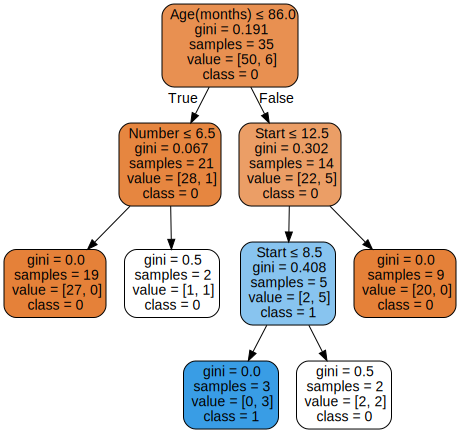

In [ ]:
graph